In [638]:
# API
from pycrunchbase import *

# Python
from datetime import datetime
from collections import Counter
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import re

# Database
from pymongo import MongoClient

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize
client = MongoClient()

In [756]:
# initiate a kojak database and collection with documents related to crunch_ppl

client = MongoClient()
db = client.kojak
orgs_api = db.orgs_api

In [757]:
orgs_db = orgs_api.find()

In [4]:
closed = []

for org in orgs_db:
    closed.append(org["properties"]["is_closed"])

In [446]:
# companies = pd.read_excel(io="/Users/DanShin/Downloads/Data/crunchbase_export.xlsx", sheetname="Companies")
investments = pd.read_excel(io="/Users/DanShin/Downloads/Data/crunchbase_export.xlsx", sheetname="Investments")

In [289]:
def clean_companies(companies_df):
    # convert erroneous datetimes to NaT
    companies_df.first_funding_at = companies_df.first_funding_at.apply(lambda x: np.nan if type(x) == unicode else x)
    return companies_df

In [ ]:
clean_companies(companies)

In [42]:
test_org = orgs_api.find()[8]

In [142]:
test_org.viewkeys()

dict_keys([u'relationships', u'_id', u'type', u'uuid', u'properties'])

In [143]:
test_org["properties"]

{u'api_path': u'organizations/red',
 u'closed_on': None,
 u'closed_on_trust_code': 0,
 u'created_at': 1298508763,
 u'description': u'(RED) was founded in 2006 by Bono and Bobby Shriver to get businesses and people involved in the fight against AIDS.  (RED) was created to help provide a sustainable flow of money from the private sector to fight AIDS. They\u2019ve raised over $200 million to date through the sale of (RED) products from iconic companies - like Apple and Starbucks \u2013 and from (RED) events. And 100% of that money goes to work on the ground.  dfgdfgdf\n',
 u'founded_on': u'2006-07-09',
 u'founded_on_trust_code': 7,
 u'homepage_url': u'http://www.red.org',
 u'is_closed': False,
 u'name': u'(RED)',
 u'num_employees_max': 500,
 u'num_employees_min': 251,
 u'number_of_investments': 0,
 u'permalink': u'red',
 u'primary_role': u'company',
 u'role_company': True,
 u'role_group': False,
 u'role_investor': False,
 u'role_school': False,
 u'short_description': u'(RED) was founded 

In [144]:
test_org["relationships"].viewkeys()

dict_keys([u'current_team', u'primary_image', u'past_team', u'headquarters', u'websites', u'acquired_by', u'offices', u'images', u'news', u'funding_rounds', u'categories'])

In [145]:
test_org["relationships"]["categories"]

{u'cardinality': u'ManyToMany',
 u'items': [{u'properties': {u'created_at': 1397980727,
    u'name': u'Nonprofits',
    u'organizations_in_category': 934,
    u'products_in_category': 3,
    u'updated_at': 1434019823,
    u'web_path': u'category/nonprofits/fb2f0892ea6a8362461250e381ed9b08'},
   u'type': u'Category',
   u'uuid': u'fb2f0892ea6a8362461250e381ed9b08'}],
 u'paging': {u'first_page_url': u'https://api.crunchbase.com/v/3/organizations/red/categories',
  u'sort_order': u'created_at DESC',
  u'total_items': 1}}

In [146]:
"current_team" in test_org["relationships"]

True

In [104]:
X = test.iloc[:,0:2]
y = test.iloc[:,2]

In [149]:
total = orgs_db.count()
has_team = 0

for org in orgs_db:
    if "current_team" in org["relationships"]:
        has_team += 1
    
print float(has_team)/total

0.719537815126


In [91]:
cb_api_key = "f724cd5232dd318067da50fd13ec28bc"
cb = CrunchBase(cb_api_key)
some_person = cb.person("bill-gates")

In [92]:
some_person.data["type"]

u'Person'

In [167]:
some_person.data["relationships"].viewkeys()

dict_keys([u'founded_companies', u'jobs', u'primary_image', u'primary_affiliation', u'websites', u'degrees', u'images', u'news', u'advisor_at', u'primary_location', u'investments'])

In [209]:
# extract school info from people

school = []
for entry in some_person.data["relationships"]["degrees"]["items"]:
    entry_nested = entry["relationships"]["school"]["properties"]["name"]
    school.append(entry_nested)

In [214]:
# 3 classes that are being predicted - acquired, closed, ipo
# only use the set which has status = to one of these 3 categories
# maybe come up with a startup grade out of 100
# do a nearest neighbors using other information
# separate category_list out into separate entities
# funding rounds
# founded_year
# founded_quarter
# founded_month
# time to first_funding
# average time between funding rounds
# funding at each round (seed, angel, series a, series b)
# number of funding rounds
# maybe do topic modeling on all company descriptions and use topics as a feature'
# number of founders
# founder schools

Counter(companies.status)

Counter({u'operating': 47220, u'acquired': 4302, u'closed': 3032, u'ipo': 1405, nan: 1197})

In [31]:
# extract school info from people

schools = []
num = 0

for company in orgs_db:
    try:
        for entry in company.data["relationships"]["degrees"]["items"]:
            entry_nested = entry["relationships"]["school"]["properties"]["name"]
            schools.append(entry_nested)
        num += 1
    except:
        continue

In [111]:
test_org = orgs_api.find_one({"uuid":"df6628127f970b439d3e12f64f504fbb"})

In [118]:
team = test_org["relationships"]["current_team"]["items"]
team[1]

{u'properties': {u'created_at': 1204653519,
  u'ended_on': None,
  u'ended_on_trust_code': None,
  u'started_on': u'2008-03-01',
  u'started_on_trust_code': 7,
  u'title': u'COO',
  u'updated_at': 1398003215},
 u'relationships': {u'person': {u'properties': {u'api_path': u'people/sheryl-sandberg',
    u'born_on': None,
    u'born_on_trust_code': None,
    u'created_at': 1204682319,
    u'died_on': None,
    u'died_on_trust_code': None,
    u'first_name': u'Sheryl',
    u'is_deceased': False,
    u'last_name': u'Sandberg',
    u'permalink': u'sheryl-sandberg',
    u'role_investor': True,
    u'updated_at': 1433774229,
    u'web_path': u'person/sheryl-sandberg'},
   u'type': u'Person',
   u'uuid': u'6bdcaf25865ad1e190f7330b99a4ee36'}},
 u'type': u'Job',
 u'uuid': u'a0e3eb89f81bc79ee797deae68e6ade7'}

In [101]:
orgs_api.find_one().viewkeys()

dict_keys([u'relationships', u'_id', u'type', u'uuid', u'properties'])

In [103]:
orgs_odm_df = pd.read_csv("/Users/DanShin/Downloads/Data/odm/organizations.csv")


In [108]:
orgs_odm_df[orgs_odm_df.name == "Facebook"]["crunchbase_uuid"]

4         df6628127f970b439d3e12f64f504fbb
269283    b6ed10344e3cad7e6baef290de9c0649
Name: crunchbase_uuid, dtype: object

In [135]:
companies.columns

Index([u'permalink', u'name', u'homepage_url', u'category_list', u'market', u'funding_total_usd', u'status', u'country_code', u'state_code', u'region', u'city', u'funding_rounds', u'founded_at', u'founded_month', u'founded_quarter', u'founded_year', u'first_funding_at', u'last_funding_at'], dtype='object')

In [574]:
# get company names
def get_names(list_of_companies):
    names = list_of_companies.name
    return names

# get matrix with category of each company
def get_categories(list_of_companies):
    # preprocess category_list
    categories = list_of_companies.category_list
    categories[categories.isnull()] = ''
    categories = categories.str.replace(' ', '-')
    categories = categories.str.strip('|')
    categories = categories.apply(lambda x: x.replace("|", " "))
    # tokenize and vectorize
    category_counts = CountVectorizer(tokenizer = tokenize.word_tokenize)
    sparse_matrix = category_counts.fit_trainsform(categories)
    return sparse_matrix.todense()

def get_funding_rounds(list_of_companies):
    num_rounds = list_of_companies.funding_rounds
    return num_rounds

def get_funding_total(list_of_companies):
    # around 10,000 of 57,000 companies have 0 funding in the database???
    funding_total_usd = list_of_companies.funding_total_usd
    return funding_total_usd

def get_founded_year(list_of_companies):
    founded_year = list_of_companies.founded_year
    return founded_year

def get_founded_month(list_of_companies):
    founded_year = list_of_companies.founded_year
    return founded_year

def get_founded_quarter(list_of_companies):
    quarter = list_of_companies.founded_quarter
    quarter = quarter.apply(lambda x: x[6:] if type(x) == unicode else x)
    return quarter

def get_first_funding(list_of_companies):
    first_funding = list_of_companies.first_funding_at
    return first_funding
    
def get_last_funding(list_of_companies):
    last_funding = list_of_companies.last_funding_at
    return last_funding

def time_to_first_funding(list_of_companies):
    time_to_first = list_of_companies.first_funding_at - list_of_companies.founded_at
    return time_to_first

def get_seed(list_of_companies):
    seed_fund = []
    for company in list_of_companies.name:
        mongo_call = orgs_api.find_one({"properties.name" : company})
        try:
            funding_info = mongo_call["relationships"]["funding_rounds"]["items"]
        except:
            seed_fund.append(np.nan)
            continue
        for funding_round in funding_info:
            if funding_round["properties"]["funding_type"] == "seed":
                seed_fund.append(funding_round["properties"]["money_raised_usd"])
            else:
                seed_fund.append(np.nan)
    return seed_fund

def get_angel(list_of_companies):
    angel_fund = []
    for company in list_of_companies.name:
        mongo_call = orgs_api.find_one({"properties.name" : company})
        try:
            funding_info = mongo_call["relationships"]["funding_rounds"]["items"]
        except:
            angel_fund.append(np.nan)
            continue
        for funding_round in funding_info:
            if funding_round["properties"]["funding_type"] == "angel":
                angel_fund.append(funding_round["properties"]["money_raised_usd"])
            else:
                angel_fund.append(np.nan)
    return angel_fund

def get_series_a(list_of_companies):
    series_a_fund = []
    for company in list_of_companies.name:
        mongo_call = orgs_api.find_one({"properties.name" : company})
        try:
            funding_info = mongo_call["relationships"]["funding_rounds"]["items"]
        except:
            series_a_fund.append(np.nan)
            continue
        for funding_round in funding_info:
            if funding_round["properties"]["funding_type"] == "venture" and funding_round["properties"]["series"].upper() == "A":
                series_a_fund.append(funding_round["properties"]["money_raised_usd"])
            else:
                series_a_fund.append(np.nan)
    return series_a_fund

def get_series_b(list_of_companies):
    series_b_fund = []
    for company in list_of_companies.name:
        mongo_call = orgs_api.find_one({"properties.name" : company})
        try:
            funding_info = mongo_call["relationships"]["funding_rounds"]["items"]
        except:
            series_b_fund.append(np.nan)
            continue
        for funding_round in funding_info:
            if funding_round["properties"]["funding_type"] == "venture" and funding_round["properties"]["series"].upper() == "B":
                series_b_fund.append(funding_round["properties"]["money_raised_usd"])
            else:
                series_b_fund.append(np.nan)
    return series_b_fund

def get_series_c(list_of_companies):
    series_c_fund = []
    for company in list_of_companies.name:
        mongo_call = orgs_api.find_one({"properties.name" : company})
        try:
            funding_info = mongo_call["relationships"]["funding_rounds"]["items"]
        except:
            series_a_fund.append(np.nan)
            continue
        for funding_round in funding_info:
            if funding_round["properties"]["funding_type"] == "venture" and funding_round["properties"]["series"].upper() == "C":
                series_c_fund.append(funding_round["properties"]["money_raised_usd"])
            else:
                series_c_fund.append(np.nan)
    return series_c_fund

def get_series_d(list_of_companies):
    series_d_fund = []
    for company in list_of_companies.name:
        mongo_call = orgs_api.find_one({"properties.name" : company})
        try:
            funding_info = mongo_call["relationships"]["funding_rounds"]["items"]
        except:
            series_a_fund.append(np.nan)
            continue
        for funding_round in funding_info:
            if funding_round["properties"]["funding_type"] == "venture" and funding_round["properties"]["series"].upper() == "D":
                series_d_fund.append(funding_round["properties"]["money_raised_usd"])
            else:
                series_d_fund.append(np.nan)
    return series_d_fund

In [753]:
names = get_names(companies)

In [755]:
len(names)

57156

In [298]:
companies.funding_total_usd.apply(lambda x: True if x == 0 else False).value_counts()

False    46482
True     10674
dtype: int64

In [406]:
companies.funding_rounds

19006    1
56796    3
49537    1
45623    1
28543    1
27709    1
55747    1
25843    1
9061     2
35966    1
9881     1
52139    2
48936    2
22192    1
22161    1
44600    1
14709    1
22305    1
52159    1
54888    1
34129    1
29114    1
3735     1
43911    2
48844    1
41579    1
34789    1
9348     1
49358    2
5116     1
        ..
12164    1
28809    1
6770     1
14714    1
6821     1
48029    1
12423    1
31176    1
33863    1
32869    1
6927     1
27383    1
27207    1
44172    1
35125    1
18480    1
1623     1
45118    1
31667    1
9136     1
25949    1
11745    1
10345    1
38302    1
4853     1
55625    1
35359    1
22240    1
31070    1
31235    1
Name: funding_rounds, dtype: int64

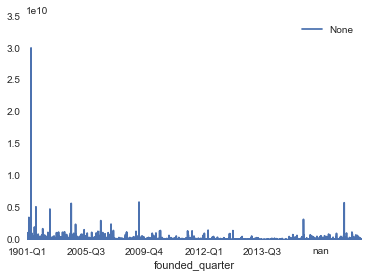

In [325]:
companies.plot("founded_quarter", "funding_total_usd")

In [322]:
'1996-Q1' > '2010-Q2'

False

In [320]:
companies.founded_quarter = companies.founded_quarter.str.strip()

In [332]:
companies = companies.sort("first_funding_at")

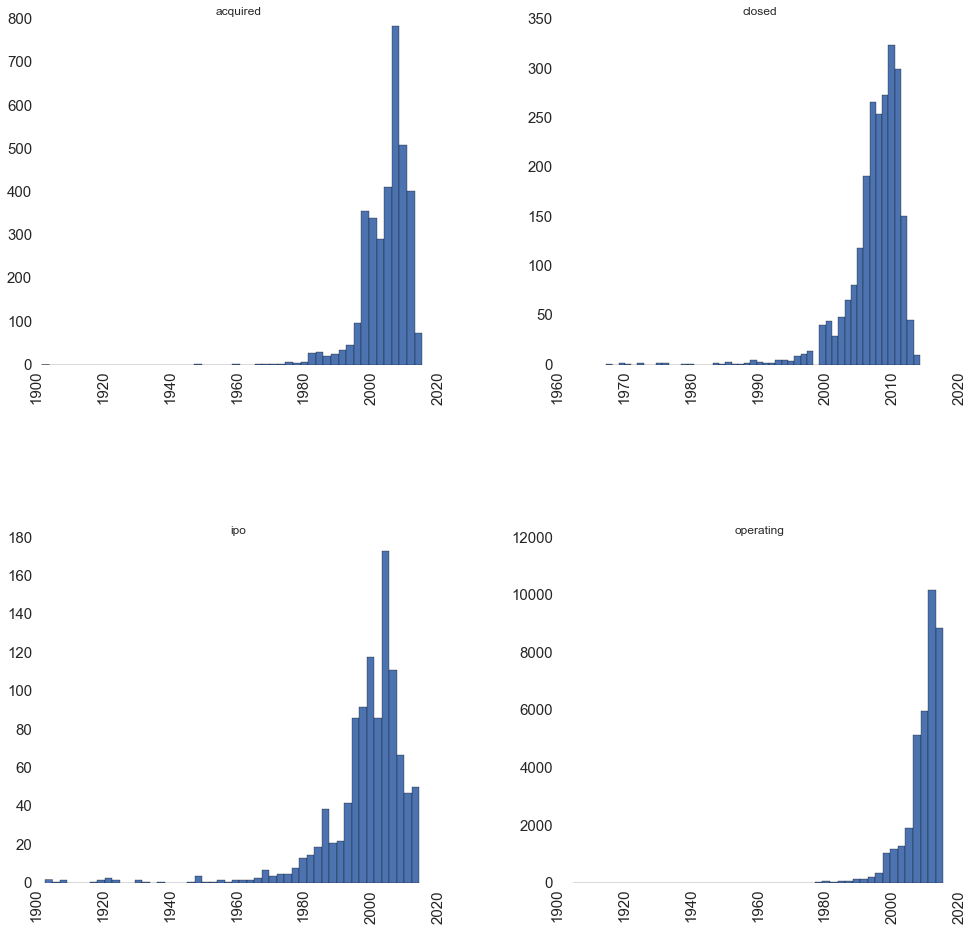

In [360]:
companies.hist("founded_year", by = "status", bins = 50, xlabelsize = 15, ylabelsize = 15, figsize = (16,16))
plt.savefig("plot.png")

In [409]:
orgs_api.find_one({"properties.name": "Facebook"})["relationships"].viewkeys()

dict_keys([u'acquisitions', u'current_team', u'primary_image', u'investors', u'past_team', u'headquarters', u'websites', u'funding_rounds', u'memberships', u'ipo', u'competitors', u'products', u'offices', u'news', u'images', u'board_members_and_advisors', u'founders', u'investments', u'sub_organizations', u'categories'])

In [568]:
orgs_api.find_one({"properties.name": "Slack"})["relationships"]["funding_rounds"]["items"][4]["properties"]

{u'announced_on': u'2011-04-01',
 u'announced_on_trust_code': 7,
 u'api_path': u'funding-rounds/542034e9a857d2320d88aff73b6e8a3e',
 u'closed_on': None,
 u'closed_on_trust_code': None,
 u'created_at': 1302628682,
 u'funding_type': u'venture',
 u'money_raised': 10700000,
 u'money_raised_currency_code': u'USD',
 u'money_raised_usd': 10700000,
 u'series': u'B',
 u'series_qualifier': None,
 u'target_money_raised': None,
 u'target_money_raised_currency_code': None,
 u'target_money_raised_usd': None,
 u'updated_at': 1429651376,
 u'web_path': u'funding-round/542034e9a857d2320d88aff73b6e8a3e'}

In [438]:
orgs_api.find_one({"properties.name": "M"})

{u'_id': ObjectId('558201a6ab99e70229cbc844'),
 u'properties': {u'api_path': u'organizations/bond-street-marketplace',
  u'closed_on': None,
  u'closed_on_trust_code': 0,
  u'created_at': 1392987958,
  u'description': u'Bond Street is a startup focused on transforming small business lending through technology, data and design.   Small business owners are the foundation for growth in our economy, and yet today\u2019s banking system has left them behind.  We\u2019re building a better future where access to financing is simple, transparent and fair.  \n',
  u'founded_on': u'2013-10-29',
  u'founded_on_trust_code': 7,
  u'homepage_url': u'https://onbondstreet.com',
  u'is_closed': False,
  u'name': u'Bond Street',
  u'num_employees_max': 10,
  u'num_employees_min': 1,
  u'number_of_investments': 0,
  u'permalink': u'bond-street-marketplace',
  u'primary_role': u'company',
  u'role_company': False,
  u'role_group': False,
  u'role_investor': False,
  u'role_school': False,
  u'short_descrip

In [451]:
print [item + str(count) for item, count in Counter(companies.name).items() if count > 1]

[nan, u'Moonlighting', u'August', u'Coinify', u'Amplitude', u'Piper', u'Symphony', u'Shake', u'Chime', u'Swarm', u'Clover', u'Jasper', u'Ripl', u'Native', u'Tutored', u'Innovis', u'Robin', u'rumr', u'Worcester Polytechnic Institute', u'Sidewalk', u'Breeze', u'Mozaico', u'Vessel', u'Torch', u'Meta', u'Zesty', u'Dazo', u'APS', u'Pangea', u'Radius', u'Splash', u'StoryToys', u'Dispatch', u'Dabble', u'Spoonfed', u'Cue', u'Agora', u'Stitch', u'Sidecar', u'The Learning Lab', u'Operator', u'Fetchr', u'Draft', u'Shift', u'Kudo', u'VistaBee', u'Castle', u'Classy', u'Friday', u'Versus', u'Nourish', u'Samsara', u'Cortex', u'Evento', u'Note', u'DocDoc', u'MediaLink', u'Hubbub', u'Particle', u'Warbler', u'Booster', u'Stoke', u'Kiwi', u'Flowhub', u'Track', u'Nudge', u'Superfly', u'Tribute', u'Workface', u'Crowdfunder', u'Kapture', u'Roadmap', u'Hive', u'Haven', u'Compass', u'Bolt', u'Hitch', u'eeGeo', u'Szl', u'Dash', u'Kite', u'Tiempo', u'Bundle', u'Gecko', u'Sprig', u'Leaf', u'Leap', u'Inspire Ener

In [575]:
ipo = 0.1
acquired = 0.3
closed = 0.6

None
None
None


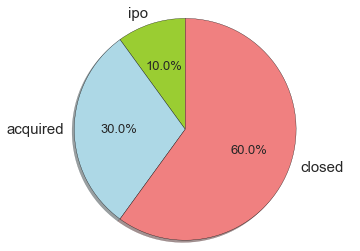

In [617]:
colors = ['yellowgreen', 'lightblue', 'lightcoral']
patches, texts, autotexts = plt.pie([ipo,acquired,closed], labels = ["ipo", "acquired", "closed"], colors = colors,
                                    shadow = True, autopct='%1.1f%%', startangle = 90)
plt.axis('equal')
for t in texts:
    t.set_size(15.0)
for a in autotexts:
    a.set_size(13)
    
plt.savefig("piechart.png")

In [618]:
companies.columns

Index([u'permalink', u'name', u'homepage_url', u'category_list', u'market', u'funding_total_usd', u'status', u'country_code', u'state_code', u'region', u'city', u'funding_rounds', u'founded_at', u'founded_month', u'founded_quarter', u'founded_year', u'first_funding_at', u'last_funding_at'], dtype='object')

In [647]:
avg_fund_round_plot = companies.groupby("status")["funding_rounds"].mean()
avg_fund_round_plot.sort()

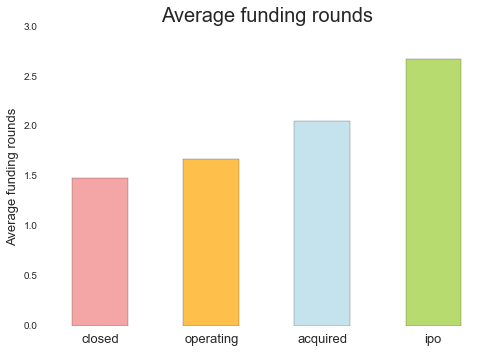

In [697]:
avg_fund_round.plot(kind = "bar", figsize = (7, 5), rot = 0, alpha = 0.7, color = ["lightcoral", "orange", "lightblue", "yellowgreen"])
plt.xticks(size = 13)
plt.title("Average funding rounds", size = 20)
plt.xlabel("")
plt.ylabel("Average funding rounds", size = 13)
plt.tight_layout()
plt.savefig("barplot.png")

In [698]:
companies.status

Index([u'permalink', u'name', u'homepage_url', u'category_list', u'market', u'funding_total_usd', u'status', u'country_code', u'state_code', u'region', u'city', u'funding_rounds', u'founded_at', u'founded_month', u'founded_quarter', u'founded_year', u'first_funding_at', u'last_funding_at'], dtype='object')

In [724]:
closed_funding = companies[companies.status == "closed"]["funding_rounds"].value_counts()
ipo_funding = companies[companies.status == "ipo"]["funding_rounds"].value_counts()
acquired_funding = companies[companies.status == "acquired"]["funding_rounds"].value_counts()

In [722]:
closed_funding.index

Int64Index([1, 2, 3, 4, 5, 6, 8, 7, 9, 11, 14], dtype='int64')

plt.figure(figsize=(8,6))
ipo_funding.plot(color = "yellowgreen")
closed_funding.plot(color = "lightcoral")
acquired_funding.plot(color = "lightblue")
plt.legend(["ipo", "closed", "acquired"])
plt.xlabel("Number of funding rounds", size = 13)
plt.ylabel("Frequency", size = 13)
plt.savefig("funding_round_line.png")

In [749]:
companies[companies.funding_rounds > 8].shape

(243, 18)

In [750]:
companies.shape

(57156, 18)

In [751]:
companies.columns

Index([u'permalink', u'name', u'homepage_url', u'category_list', u'market', u'funding_total_usd', u'status', u'country_code', u'state_code', u'region', u'city', u'funding_rounds', u'founded_at', u'founded_month', u'founded_quarter', u'founded_year', u'first_funding_at', u'last_funding_at'], dtype='object')